<a href="https://colab.research.google.com/github/wjung1008/forensic_watermark/blob/main/Forensic_watermark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary library

In [25]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

## Read in the image and visualize the original image and watermark

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


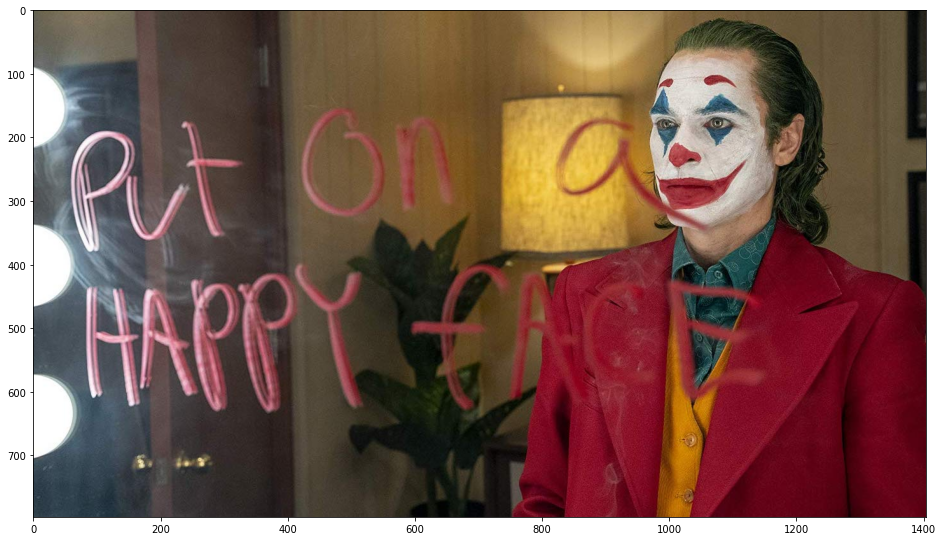

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

img_file = '/content/gdrive/MyDrive/Forensic_watermark/joker.jpg'


img_ori = cv2.imread(img_file)
height, width, _ = img_ori.shape

plt.figure(figsize=(16, 10))
plt.imshow(img_ori[:, :, ::-1])

(96, 182)


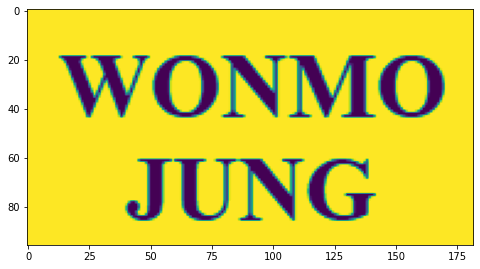

In [27]:
watermark_file = '/content/gdrive/MyDrive/Forensic_watermark/watermark.png'


watermark = cv2.imread(watermark_file)
watermark = cv2.cvtColor(watermark, cv2.COLOR_BGR2GRAY)
wm_height, wm_width = watermark.shape
# print(height, width)
# print(wm_height, wm_width)
print(watermark.shape)
plt.figure(figsize=(8, 5))
plt.imshow(watermark)

## Encode the image using FFT
- The watermark will be scattered throughout the image using random.seed
- It is important to remember the seed number to restore the watermark later on.

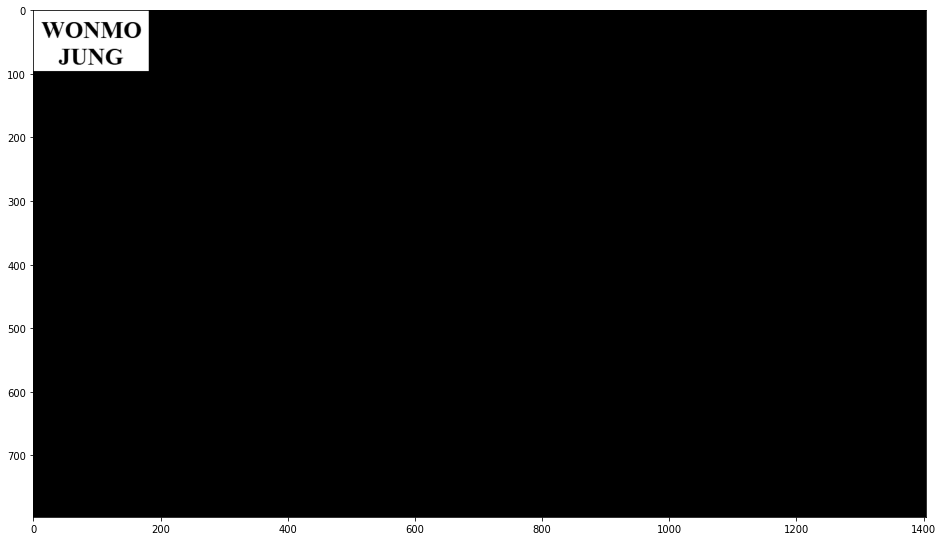

In [28]:
img_f = np.fft.fft2(img_ori)

y_random_indices, x_random_indices = list(range(height)), list(range(width))
random.seed(20)
random.shuffle(x_random_indices)
random.shuffle(y_random_indices)

random_wm = np.zeros(img_ori.shape, dtype=np.uint8)

for y in range(wm_height):
    for x in range(wm_width):
        # random_wm[y_random_indices[y], x_random_indices[x]] = watermark[y, x]
        random_wm[y, x] = watermark[y, x]

plt.figure(figsize=(16, 10))
plt.imshow(random_wm)

## Apply the scattered watermark to the original image
- Alpha intensifies the watermark (ex. too high alpha shows visible change from the original image)

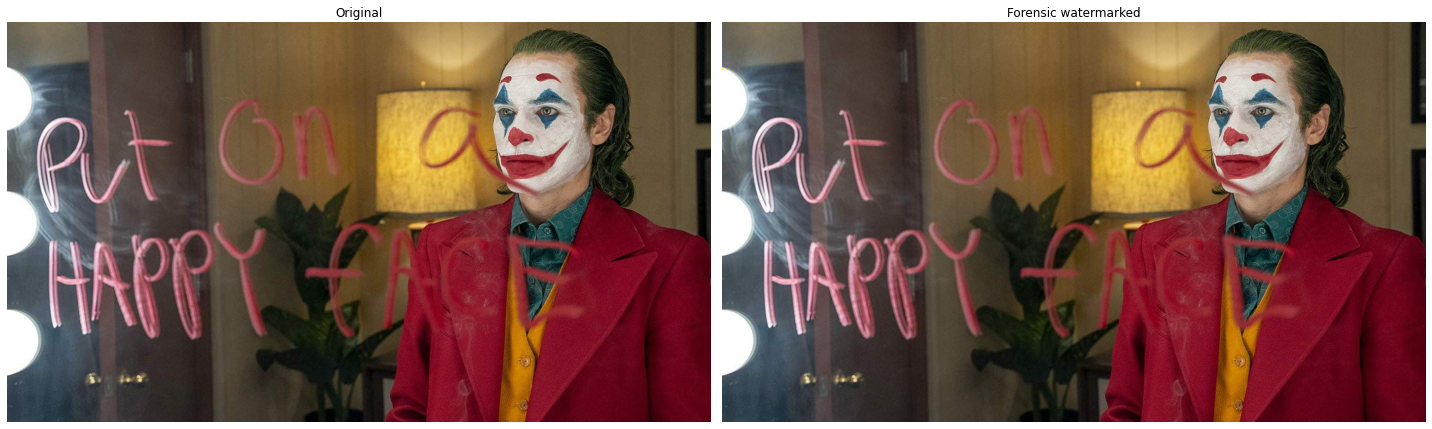

In [29]:
alpha = 3

result_f = img_f + alpha * random_wm

result = np.fft.ifft2(result_f)
result = np.real(result)
result = result.astype(np.uint8)

fig, axes = plt.subplots(1, 2, figsize=(20, 16))
axes[0].imshow(img_ori[:, :, ::-1])
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(result[:, :, ::-1])
axes[1].set_title('Forensic watermarked')
axes[1].axis('off')
fig.tight_layout()
plt.show()

## The watermarked image looks identical to the original image.
- To check the difference, we can simply subtract two images and see if there are any discrepency.

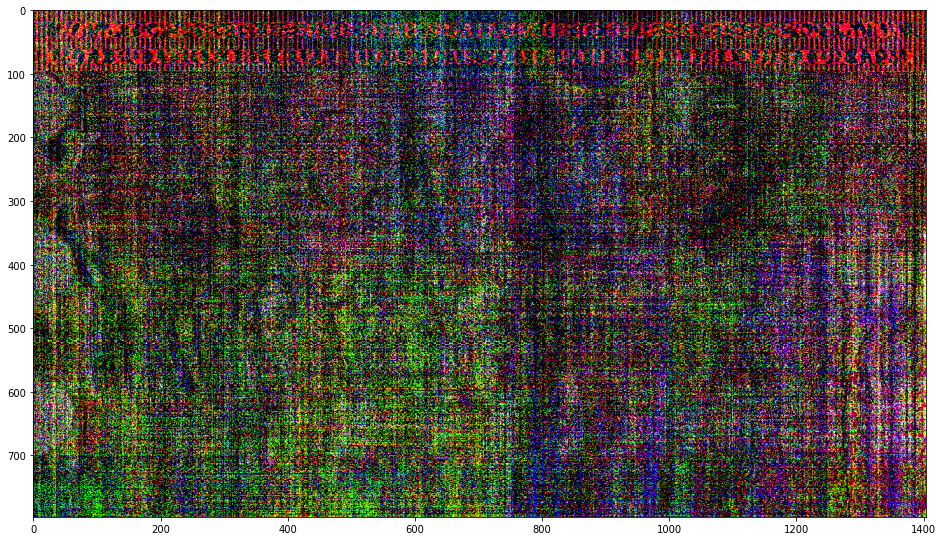

In [30]:
plt.figure(figsize=(16, 10))
plt.imshow(result - img_ori)

# Decode the image to visualize the watermark

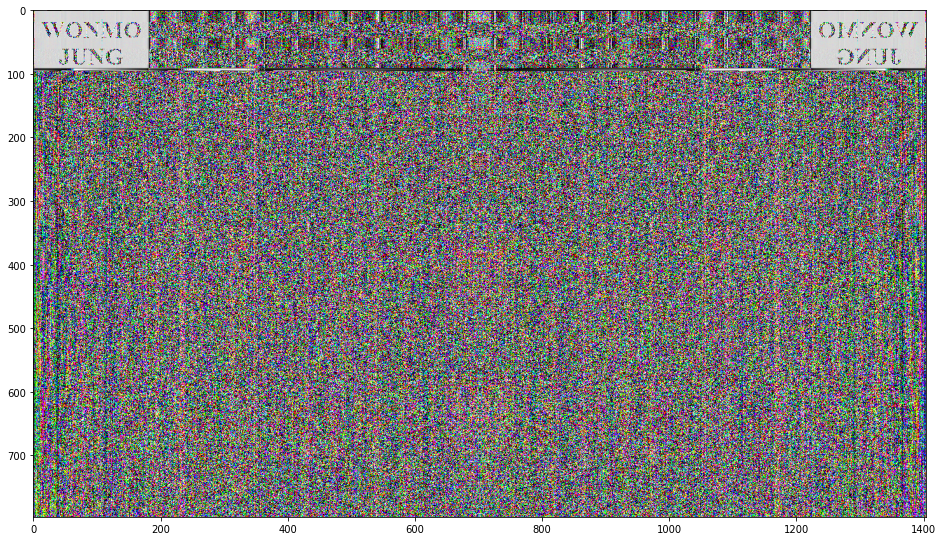

In [33]:
img_ori_f = np.fft.fft2(img_ori)
img_output_f = np.fft.fft2(result)

wm = (img_ori_f-img_output_f) / alpha
wm = np.real(wm).astype(np.uint8)

plt.figure(figsize=(16, 10))
plt.imshow(wm)

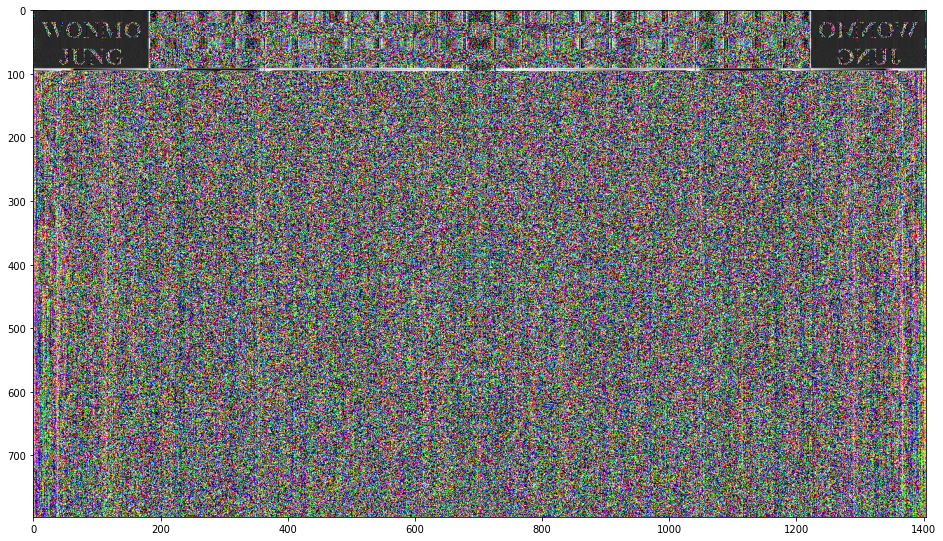

In [32]:
result2 = np.zeros(wm.shape, dtype=np.uint8)

for y in range(height):
    for x in range(width):
        result2[y, x] = wm[y, x]

plt.figure(figsize=(16, 10))
plt.imshow(result2)